In [588]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [589]:
df = pd.read_csv("../../our_analyses/dataset_prepared.csv")


In [590]:
from sklearn.preprocessing import LabelEncoder

df=df.drop(['name', 'artists', 'album_name'], axis=1)

# genre_groups = {
#     'j-dance': 0, 'techno': 0, 'mandopop': 0, 'idm': 0, 'chicago-house': 0, 'breakbeat': 0,  # Elettronica/Dance
#     'black-metal': 1,  # Metal/Rock
#     'bluegrass': 2,  # Country/Folk
#     'j-idol': 3, 'spanish': 3, 'disney': 3, 'brazil': 3,  # Pop/Commerciale
#     'iranian': 4, 'afrobeat': 4, 'indian': 4, 'forro': 4,  # World
#     'happy': 5, 'sleep': 5, 'study': 5,  # Ambient/New Age
#     'industrial': 6  # Other
# }
genre_groups = {
        'j-dance': 0, 'techno': 0, 'chicago-house': 0, 'breakbeat': 0, 'idm': 0, 
        'happy': 1, 'sleep': 1, 'study': 1, 'disney': 1, 'iranian': 1,
        'bluegrass': 2, 'forro': 2, 'mandopop': 2, 'indian': 2, 'brazil': 2, 
        'black-metal': 3, 'industrial': 3, 
        'j-idol': 4, 'spanish': 4, 'afrobeat': 4, 
}

# Mappatura dei generi del dataframe ai gruppi di generi
df['genre_group'] = df['genre'].map(genre_groups).astype(int)

# Stampa del mapping dei generi ai numeri corrispondenti
print(df['genre_group'].unique())

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

drop_attributes=[ 'mode', 'time_signature', 'key', 'genre'] #, 'mode', 'time_signature']
df = df.drop(drop_attributes, axis=1)

[4 3 2 0 1]


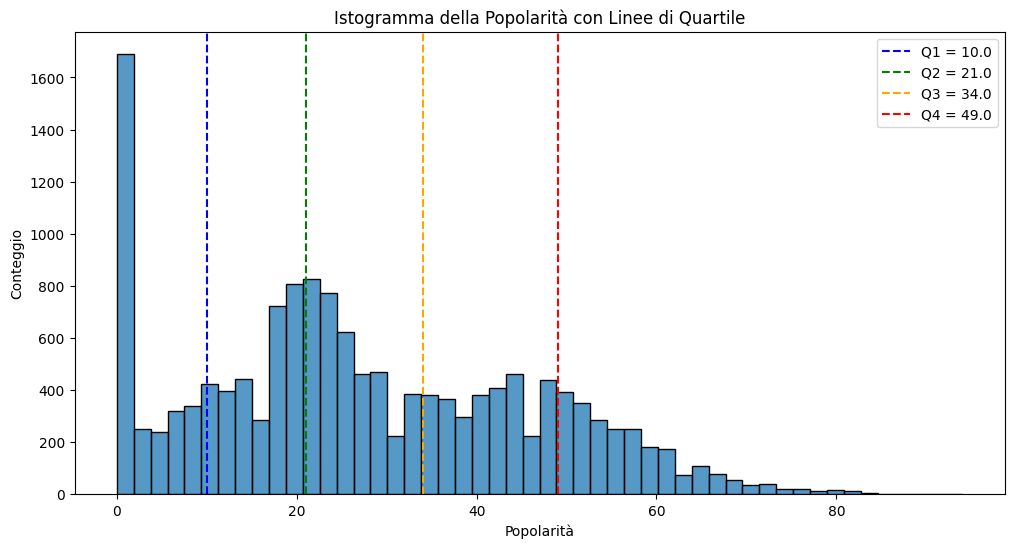

In [591]:
Q1 = df['popularity'].quantile(0.2)
Q2 = df['popularity'].quantile(0.4)
Q3 = df['popularity'].quantile(0.65)
Q4 = df['popularity'].quantile(0.85)
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=50, kde=False)
plt.axvline(x=Q1, color='blue', linestyle='--', label=f'Q1 = {Q1}')
plt.axvline(x=Q2, color='green', linestyle='--', label=f'Q2 = {Q2}')
plt.axvline(x=Q3, color='orange', linestyle='--', label=f'Q3 = {Q3}')
plt.axvline(x=Q4, color='red', linestyle='--', label=f'Q4 = {Q4}')
plt.xlabel('Popolarità')
plt.ylabel('Conteggio')
plt.title('Istogramma della Popolarità con Linee di Quartile')
plt.legend()
plt.show()

In [592]:
df_tempo = df[df['tempo'] == 0.0]

# Conta le occorrenze per ciascun gruppo di genere
occurrences_by_genre_group = df_tempo['genre_group'].value_counts()

print(occurrences_by_genre_group)

1    89
4     1
2     1
Name: genre_group, dtype: int64


In [593]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# # Filtro per rimuovere le righe con tempo=0 e non appartenenti ai genre_group 2 e 4
df = df[~((df['tempo'] == 0) & (~df['genre_group'].isin([1])))]

# # Filtro per rimuovere le righe con acousticness e energy > 0.8 e non appartenenti ai genre_group 1 e 2
df = df[~((df['acousticness'] > 0.7) & (df['energy'] > 0.7) & (~df['genre_group'].isin([1])))]
df = df[~((df['acousticness'] < 0.3) & (df['energy'] < 0.3) & (~df['genre_group'].isin([1])))]

# Il DataFrame 'df' ora contiene solo le righe che soddisfano le tue condizioni

# Calcola i quantili per 'popularity'
Q1 = df['popularity'].quantile(0.2)
Q2 = df['popularity'].quantile(0.4)
Q3 = df['popularity'].quantile(0.65)
Q4 = df['popularity'].quantile(0.85)

# Definisci gli intervalli di bin
bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']

# Crea una copia del DataFrame

# Crea la colonna 'popularity_category' con i valori discretizzati
df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)
df=df.drop(["popularity"], axis=1)

le = LabelEncoder()
df['popularity_category'] = le.fit_transform(df['popularity_category'])

df.head()

,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_group,popularity_category
0,293106,0,0.401,0.683,-5.722,0.0401,0.181,0.000000,0.0837,0.226,135.951,4,3
1,194972,0,0.672,0.858,-5.233,0.1450,0.456,0.811000,0.1040,0.963,166.689,4,3
2,178428,0,0.636,0.826,-7.486,0.0585,0.461,0.271000,0.1410,0.731,102.809,4,2
3,238373,0,0.733,0.862,-5.813,0.0604,0.287,0.000532,0.4660,0.745,107.981,4,1
4,221893,0,0.712,0.225,-10.017,0.0533,0.930,0.001000,0.1230,0.429,87.520,4,2


In [594]:
df_tempo = df[df['tempo'] == 0.0]

# Conta le occorrenze per ciascun gruppo di genere
occurrences_by_genre_group = df_tempo['genre_group'].value_counts()

print(occurrences_by_genre_group)

1    89
Name: genre_group, dtype: int64


In [595]:
import pandas as pd

# Filtra il DataFrame per rimuovere le righe con tempo=0 e genre_group=1 o genre_group=6
# df = df[~((df['tempo'] == 0) & ((df['genre_group'] == 2) | (df['genre_group'] == 4)))]
# Filtra il DataFrame per tempo uguale a 0.0
df_tempo = df[df['tempo'] == 0.0]

# Raggruppa per 'genre_group' e conta le occorrenze per ciascun gruppo
conteggio_per_genere = df_tempo['genre_group'].value_counts()

print(conteggio_per_genere)


1    89
Name: genre_group, dtype: int64


In [596]:
# df = df[((df['acousticness'] > 0.8) | (df['energy'] > 0.8)) & ((df['genre_group'] == 1) | (df['genre_group'] == 2))]


rows_with_time_zero = df[df['acousticness']>0.8]
rows_with_energy=rows_with_time_zero[rows_with_time_zero['energy']>0.7]
conteggio_per_genere = rows_with_energy['genre_group'].value_counts()

print(conteggio_per_genere)


1    52
Name: genre_group, dtype: int64


In [597]:
rows_with_time_zero = df[df['acousticness']<0.3]
rows_with_energy=rows_with_time_zero[rows_with_time_zero['energy']<0.3]
conteggio_per_genere = rows_with_energy['genre_group'].value_counts()

print(conteggio_per_genere)

1    127
Name: genre_group, dtype: int64


In [598]:
Q1 = df['popularity'].quantile(0.2)
Q2 = df['popularity'].quantile(0.4)
Q3 = df['popularity'].quantile(0.65)
Q4 = df['popularity'].quantile(0.85)
print(Q4)
bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']

# Assicurati che df sia definito. Se no, crea una copia di df
df = df.copy()

# Crea una nuova colonna 'popularity_category' con i valori discretizzati
df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)

# Visualizza le prime 10 righe per le colonne 'popularity' e 'popularity_category'
print(df[["popularity", "popularity_category"]].head(10))

# Crea un grafico a barre per 'popularity_category'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="popularity_category")
plt.show()
bin_counts = pd.cut(df['popularity'], bins=bin_edges).value_counts().sort_index()
print(bin_counts)

KeyError: 'popularity'

In [ ]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_group,popularity_category
0,293106,0,50,0.401,0.683,-5.722,0.0401,0.181,0.000000,0.0837,0.226,135.951,4,Very High Popularity
1,194972,0,52,0.672,0.858,-5.233,0.1450,0.456,0.811000,0.1040,0.963,166.689,4,Very High Popularity
2,178428,0,22,0.636,0.826,-7.486,0.0585,0.461,0.271000,0.1410,0.731,102.809,4,Medium Popularity
3,238373,0,20,0.733,0.862,-5.813,0.0604,0.287,0.000532,0.4660,0.745,107.981,4,Low Popularity
4,221893,0,22,0.712,0.225,-10.017,0.0533,0.930,0.001000,0.1230,0.429,87.520,4,Medium Popularity
